In [11]:
import geopandas as gpd
import momepy
from shapely.geometry import JOIN_STYLE,MultiPolygon, Polygon
import matplotlib.pyplot as plt
import libpysal
from shapely.ops import voronoi_diagram
from shapely.ops import unary_union
from shapely.geometry import JOIN_STYLE,MultiPolygon, Polygon
import matplotlib.pyplot as plt
import GeoTool

# 数据获取

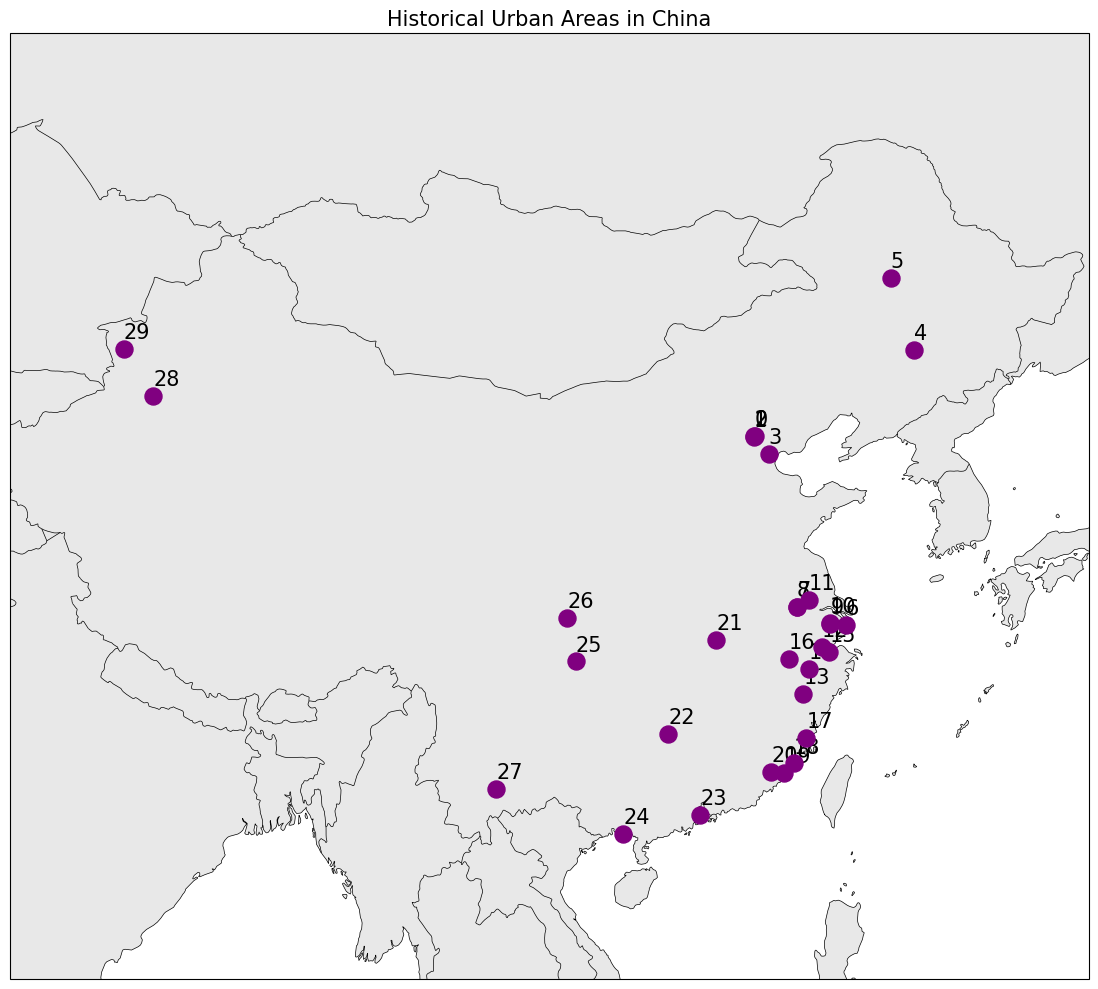

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 城市点数据
locations = {
    "Beijing_Huangcheng": (39.9169598199465, 116.3970548808332),
    "Beijing_Dashilan": (39.89227208420306, 116.39299051221566),
    "Beijing_Dongsi": (39.92666739466571, 116.42189680492304),
    "Tianjin_Wudadao": (39.11065420507058, 117.20086757242078),
    "Changchun_Yiqi": (43.85733708573866, 125.27739480109254),
    "Qiqihar_Luoxiya": (47.16131852105414, 123.9855803327217),
    "Shanghai_Waitan": (31.23648177919137, 121.48551132989251),
    "Nanjing_Meiyuan": (32.07397378224679, 118.79776497217972),
    "Nanjing_Yihe": (32.0636021343038, 118.76717680206957),
    "Suzhou_Pinjiang": (31.309639966195373, 120.6438913954338),
    "Suzhou_Shantang": (31.322471221546825, 120.621233139),
    "Yangzhou_Nanhexia": (32.39772235564695, 119.44109347340861),
    "Hangzhou_Zhongshan": (30.25063190163426, 120.17403478504638),
    "Longquan_Xijie": (28.074306414361026, 119.13267575021378),
    "Lanxi_Fushan": (29.21194230772592, 119.45814678322216),
    "Shaoxing_Cangqian": (30.008046287495326, 120.5842671865074),
    "Huangshan_Tunxi": (29.708628248789493, 118.3170381705306),
    "Fuzhou_Sanfang": (26.0822272463063, 119.29710373818405),
    "Quanzhou_Zhongshan": (24.895140380541316, 118.5882638316404),
    "Xiamen_Gulangyu": (24.45088957021436, 118.07386504609667),
    "Zhangzhou_Nanjing": (24.50767471668091, 117.3553048277267),
    "Wuhan_Jianghan": (30.575969524887916, 114.28868143130702),
    "Yongzhou_LiuziJie": (26.23010828768094, 111.6173799872717),
    "Zhongshan_Sunwenxi": (22.521389028171663, 113.3927682188146),
    "Beihai_Zhuhai": (21.666796302683156, 109.1235930138585),
    "Chongqing_Ciqikou": (29.57490241800665, 106.47093783001881),
    "Langzhong_Huaguang": (31.55987327926392, 105.9920257681808),
    "Honghe_Shipin": (23.71088752613456, 102.04669207019683),
    "Kuche_Resitan": (41.74101409127801, 82.97309549549593),
    "Yining_Qianjin": (43.8983526542975, 81.33295364362231)
}

# 转换为 GeoDataFrame
gdf = gpd.GeoDataFrame({
    'name': list(locations.keys()),
    'geometry': [Point(lon, lat) for lat, lon in locations.values()]
}, crs="EPSG:4326")

# 可视化
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 添加地图元素
ax.set_extent([75, 135, 15, 55])  # 中国区域
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray',alpha = 0.5)
# ax.add_feature(cfeature.OCEAN, facecolor='white')

# 绘制城市点
gdf.plot(ax=ax, color='purple', markersize=150, zorder=5)

# # 添加标注
for idx, row in gdf.iterrows():
    ax.text(row.geometry.x, row.geometry.y + 0.5, idx, fontsize=15)

plt.title("Historical Urban Areas in China", fontsize=15)
plt.tight_layout()
plt.show()


In [12]:
# 读取边（街道轴线）
edges = gpd.read_file("data/road_network_cache/Nanjing_Meiyuan/Nanjing_Meiyuan_edges.shp").to_crs("EPSG:32650")
# 读取节点（交叉点）
nodes = gpd.read_file("data/road_network_cache/Nanjing_Meiyuan/Nanjing_Meiyuan_nodes.shp").to_crs("EPSG:32650")
# 读取POI（百度地图点）
# pois = gpd.read_file("road_network_cache/Nanjing_Yihe/Suzhou_Pinjiang_poi_baidu.shp").to_crs("EPSG:32650")
# 读取Building（建筑地图）
buildings = gpd.read_file("data/road_network_cache/Nanjing_Meiyuan/Nanjing_Meiyuan_buildings.shp").to_crs("EPSG:32650")


# 计算地块获取

D:\STUDY\anaconda3\envs\urban_morphology\lib\site-packages\geopandas\array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 50N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


2      172448.410800
3      311727.084358
4      243804.152450
5       70860.609300
6       18197.864944
           ...      
126      1058.754715
127      1341.100735
128      1437.713634
129     27364.472942
130      1300.538591
Length: 107, dtype: float64


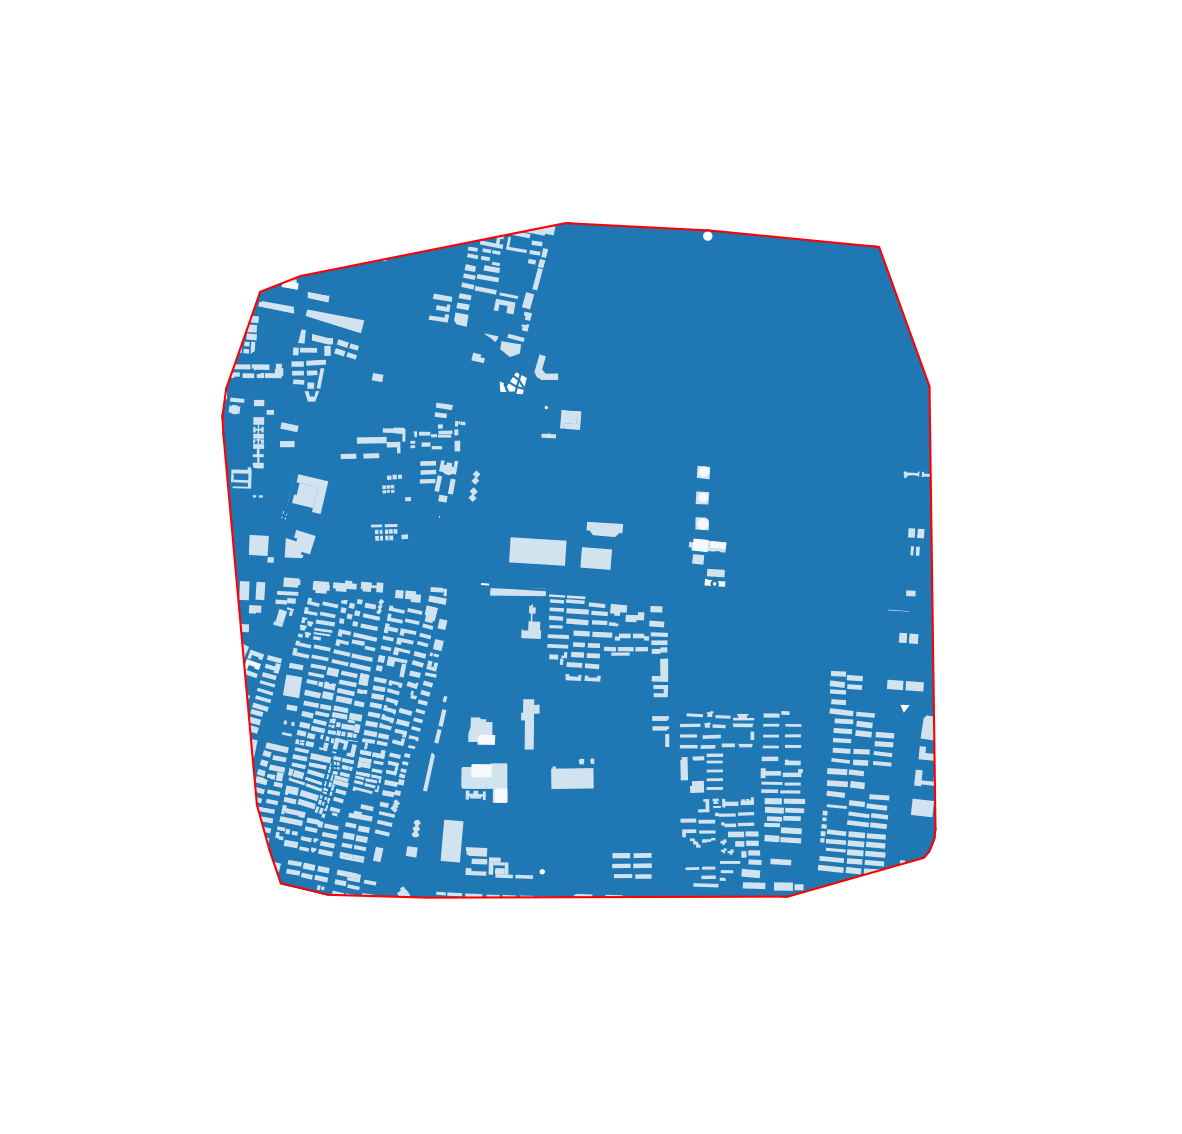

In [21]:
roads = edges.copy()
convex_hull = roads.union_all().convex_hull
enclosures = momepy.enclosures(roads, limit=convex_hull)
enclosures = enclosures[enclosures.area >1000]
ax = roads.plot(figsize=(15, 15))
hull =gpd.GeoDataFrame(geometry=[convex_hull.boundary],crs="EPSG:32650")
hull.plot(ax=ax, color="r")
ax.set_axis_off()

enclosures.plot(ax=ax).set_axis_off()
buildings.plot(ax=ax,color="white",alpha=0.8)
print(enclosures.area)

# 建筑数据预处理

0    LineString
dtype: object


<Axes: >

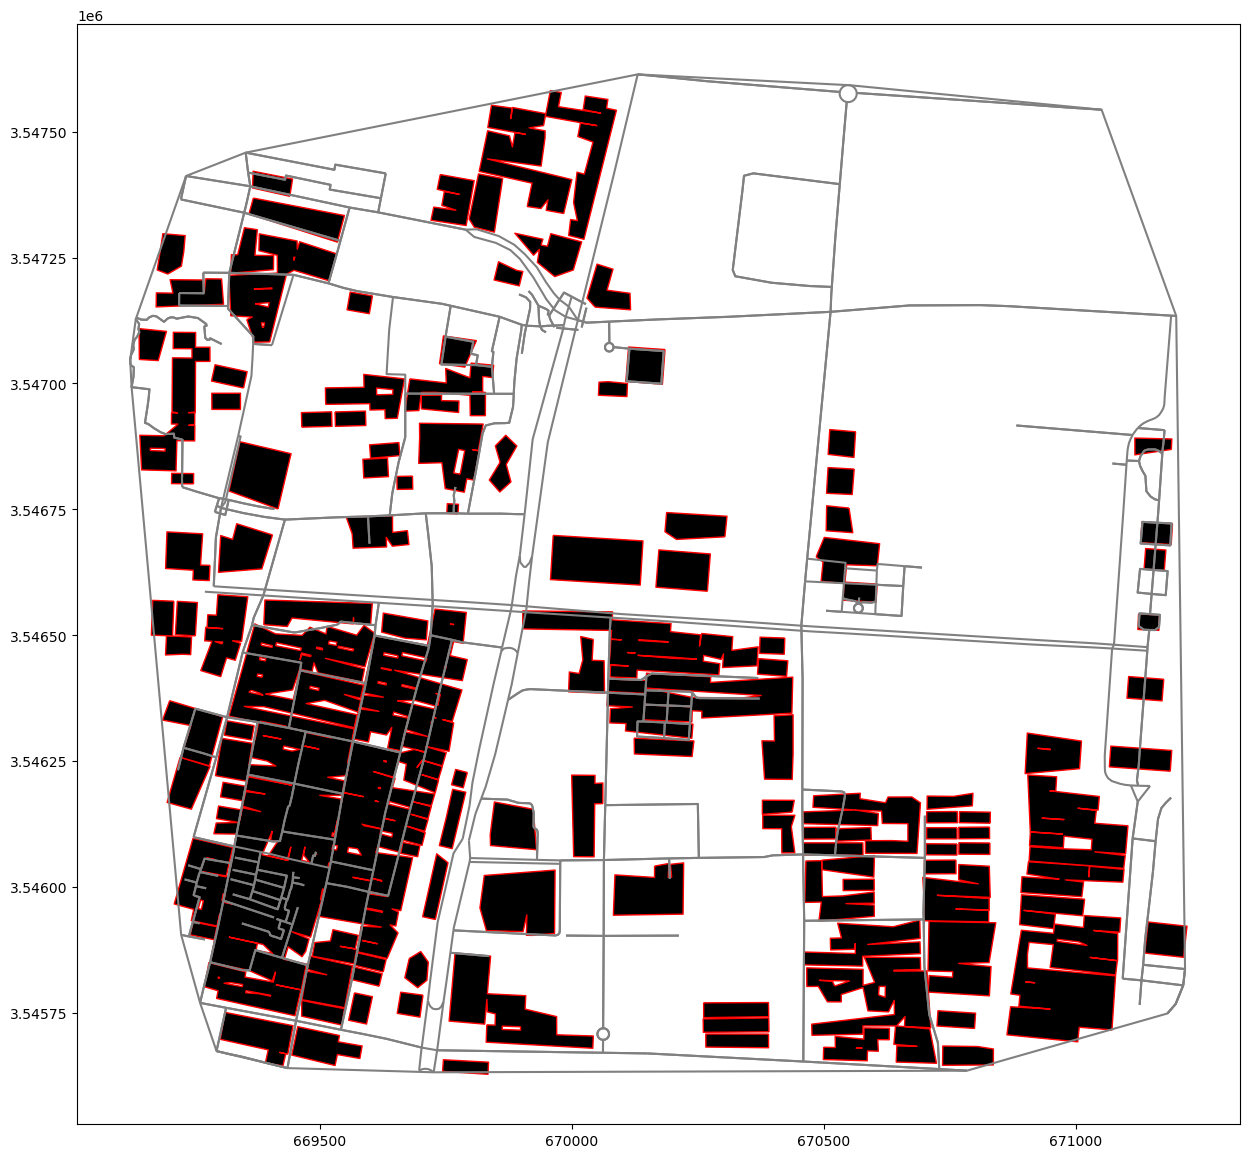

In [24]:

print(hull.type)
split_gdf,buildings_in_hull= GeoTool.create_split_gdf(buildings,convex_hull)
fig, ax = plt.subplots(figsize=(15, 15))
split_gdf.plot(ax=ax, color="black",edgecolor="red")
# buildings_in_hull.plot(ax=ax, color="black",alpha=0.8)
roads.plot(ax=ax, color="grey",)
hull.plot(ax=ax,color="grey")

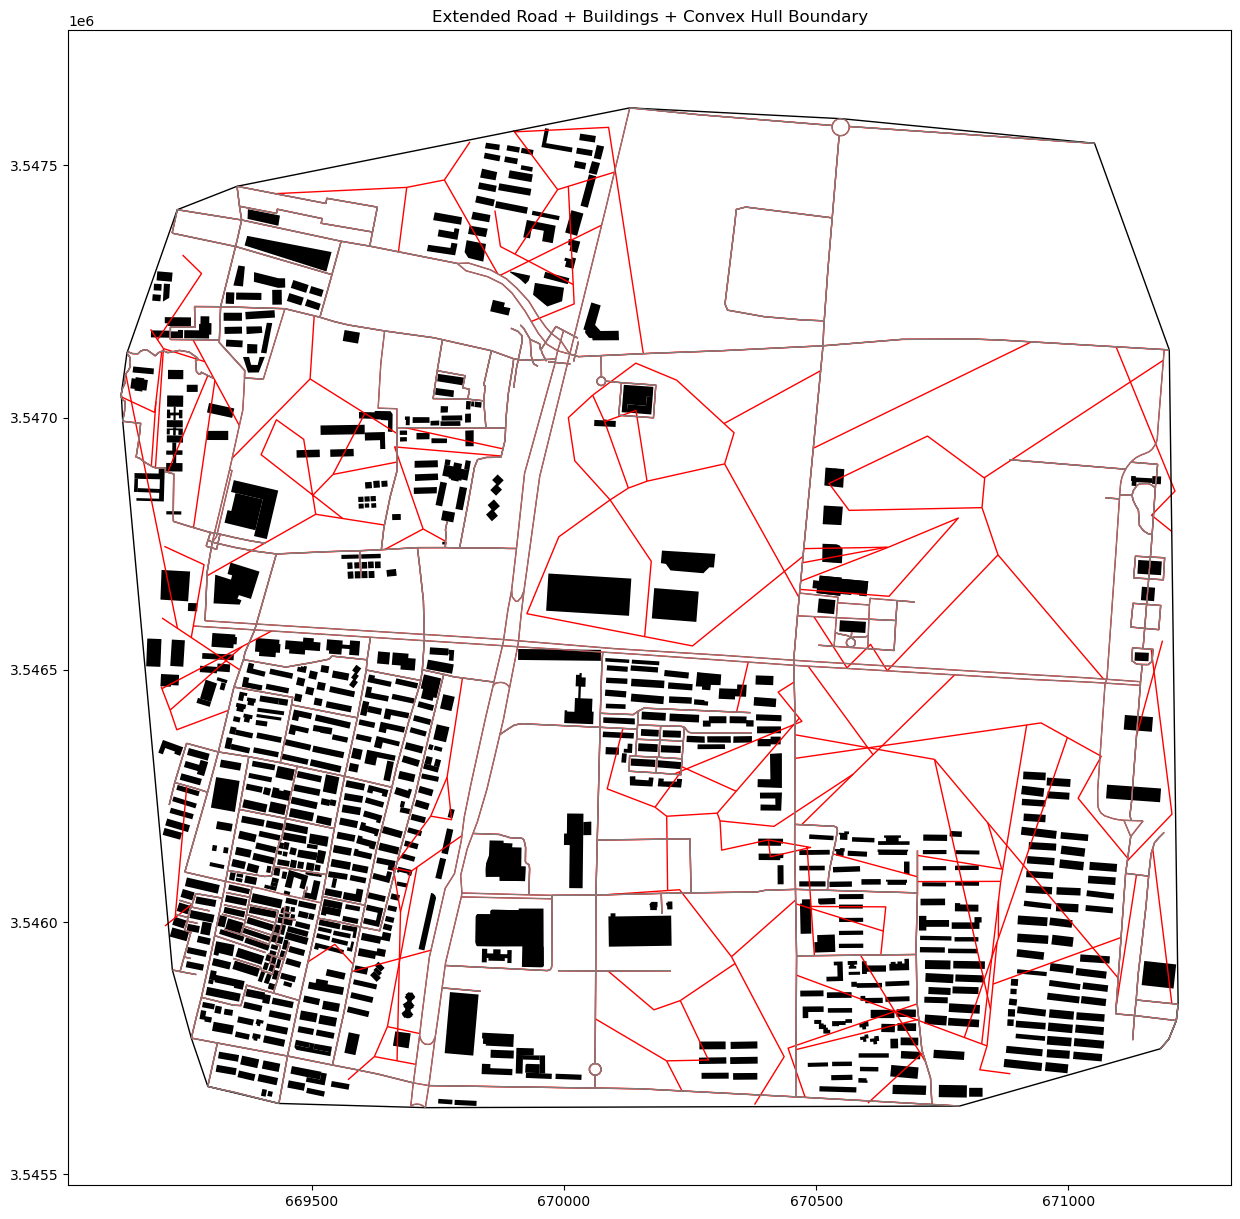

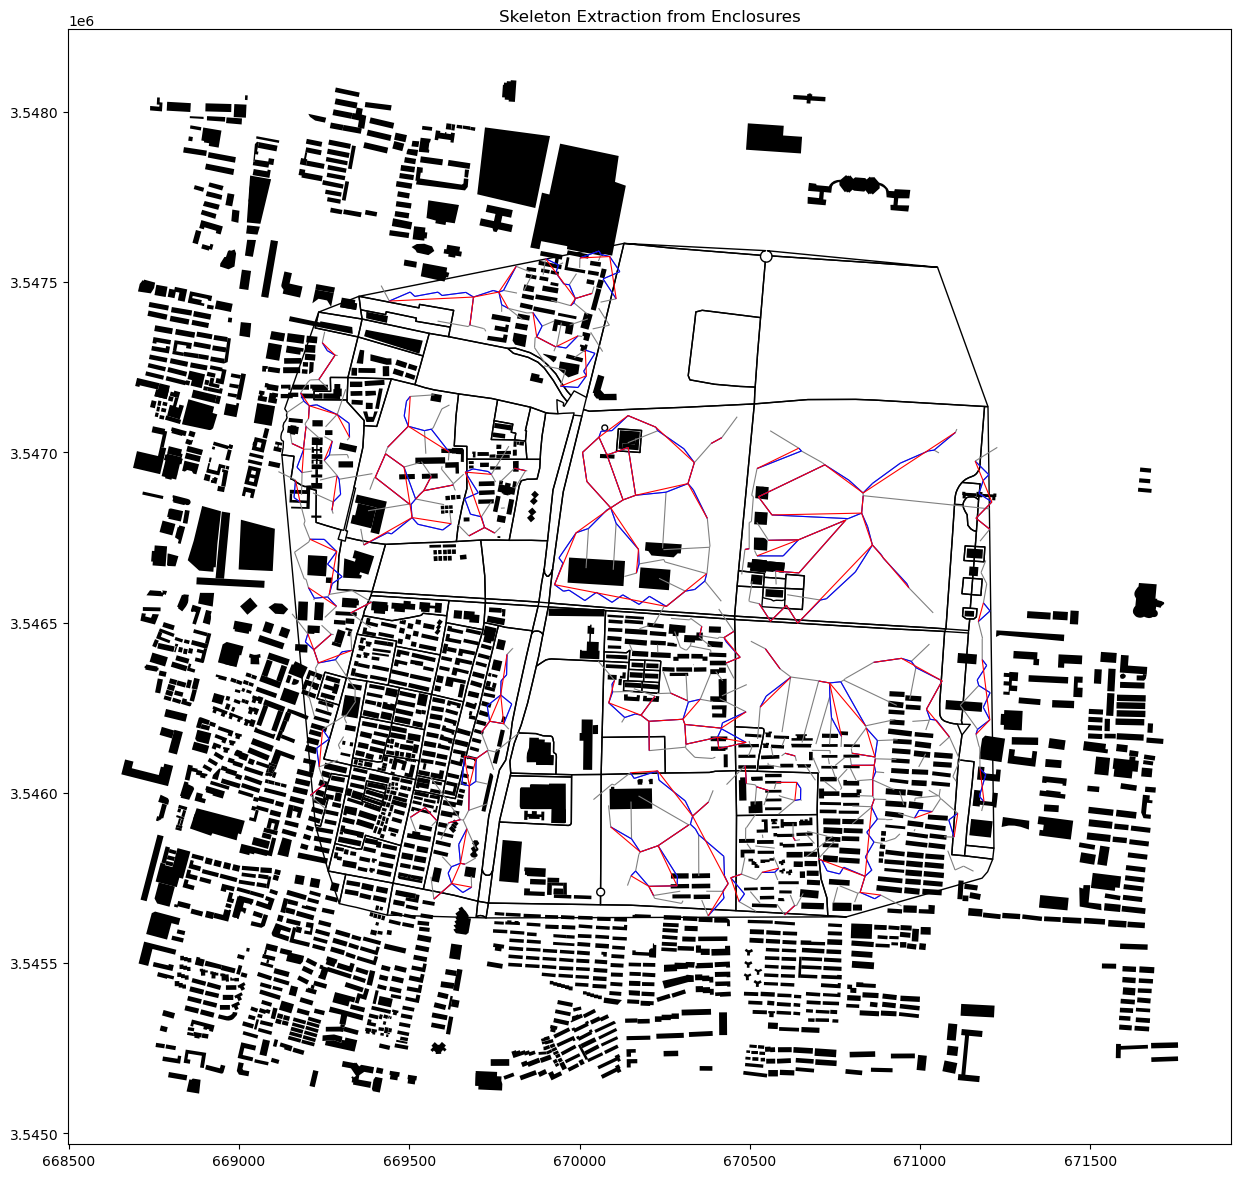

In [25]:
import GeoTool

skeleton_raw, skeleton_clean, skeleton_total = GeoTool.generate_skeletons_from_buildings(buildings=split_gdf, enclosures=enclosures,spacing=80,min_length=10,epsilon=30)
closed = GeoTool.plot_extended_road_closure(buildings_in_hull, roads, skeleton_total, enclosures, convex_hull)

ax = enclosures.plot(edgecolor="black", facecolor="none", figsize=(15, 15))
buildings.plot(ax=ax, color="black")

skeleton_raw.plot(ax=ax, color="grey", linewidth=0.8)
skeleton_clean.plot(ax=ax, color="blue", linewidth=0.8)
skeleton_total.plot(ax=ax, color="red", linewidth=0.8)
plt.title("Skeleton Extraction from Enclosures")
plt.show()
# 粗暴打标
roads["label"] = 1
hull["label"] = 1
closed["label"] = 0

# 合并三类 street

In [ ]:
from shapely.ops import snap
import pandas as pd

tolerance = 5
# 合并所有线段
combined = gpd.GeoDataFrame(pd.concat([roads, closed,hull]), crs=roads.crs)
lines = [
    part
    for geom in combined.geometry if geom is not None
    for part in (geom.geoms if geom.geom_type == 'MultiLineString' else [geom])
]
# print(combined)
# 使用 linemerge 前，先 snap 所有线段首尾点，增强连接性
snapped_lines = []
for i in range(len(lines)):
    base = lines[i]
    for j in range(i + 1, len(lines)):
        base = snap(base, lines[j], tolerance)
    snapped_lines.append(base)

merged = GeoTool.safe_linemerge(snapped_lines)


In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
merged_gdf=gpd.GeoDataFrame(geometry=merged,crs=roads.crs)
# 使用空间最近邻匹配，给 merged_gdf 添加 label
merged_gdf = gpd.sjoin_nearest(merged_gdf, combined[["geometry", "label"]], how="left", distance_col="dist")
print(merged_gdf)
merged_gdf.plot(ax=ax, color="black",edgecolor="red")
roads.plot(ax=ax, color="black")
nodes.plot(ax=ax, color="red")

In [ ]:
import momepy
import geopandas as gpd

# 1. 创建 networkx 图（这一步会自动打断线段）
G = momepy.gdf_to_nx(merged_gdf, approach='primal', multigraph=False)
# print(G)
# 2. 提取 edges 和 nodes 为 GeoDataFrame
# edges_gdf = momepy.nx_to_gdf(G, points=False)  # edges
nodes_gdf,edges_gdf= momepy.nx_to_gdf(G, points=True)   # nodes
fig, ax = plt.subplots(figsize=(15, 15))
edges_gdf.plot(ax=ax, color="red")
nodes_gdf .plot(ax=ax, color="red")
# closed.plot(ax=ax, color="orange")
roads.plot(ax=ax, color="black")
print(edges_gdf.columns)

# # 3. 保存为 shp（可选）
# edges_gdf.to_file("edges.shp")
# nodes_gdf.to_file("nodes.shp")
buildings_in_hull.plot(ax=ax,color="black")

In [ ]:
edges_gdf.to_file("road_network_gen/Nanjing_Yihe/Nanjing_Yihe_edges.shp")
nodes_gdf.to_file("road_network_gen/Nanjing_Yihe/Nanjing_Yihe_nodes.shp")
# pois.to_file("road_network_gen/Nanjing_Yihe/Nanjing_Yihe_poi_baidu.shp")
buildings.to_file("road_network_gen/Nanjing_Yihe/Nanjing_Yihe_buildings.shp")

In [ ]:
import os
from tqdm import tqdm
from utils import segment_utils
import importlib
# import GeoTool
# importlib.reload(GeoTool)


root_dir = "data/road_network_cache"

# 获取所有 area_name（即所有子目录名）
area_names = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))]

for area_name in tqdm(area_names, desc="Processing areas"):
    try:
        segment_utils.process_area(area_name)
    except Exception as e:
        print(f"Error processing {area_name}: {e}")

D:\STUDY\anaconda3\envs\urban_morphology\lib\site-packages\geopandas\array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 50N (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


2      172448.410800
3      311727.084358
4      243804.152450
5       70860.609300
6       18197.864944
8      419772.140638
9      400709.783930
16     132076.761120
18      71724.737872
19      28531.507581
20      30363.528238
22      13400.077064
23      20421.132529
24      21949.960243
25      15483.670079
26      10306.187026
27      21819.147456
28      17839.156307
29      10155.195229
30      15979.625609
31     110052.949821
32      25118.888530
33      18935.891053
34      98278.070764
38      12253.965536
40      32480.115148
41      60520.355091
43      91161.350623
45      13045.684626
46      19836.713907
47      24904.249421
48      31044.950302
49      40529.555308
50      47855.489168
52     156699.912011
53     148821.437915
54     146720.937464
56      10992.217721
60      23572.295711
61      10027.527025
62      14403.694041
63      22061.599421
64      86370.330755
66      27535.764205
67      63753.536909
70      10997.833890
77      12919.226669
81      20076

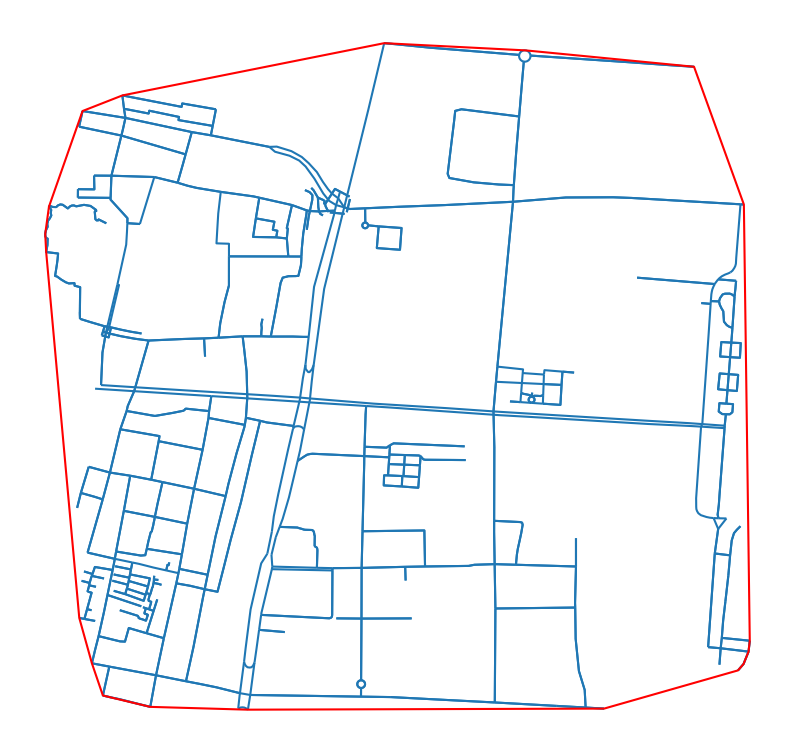

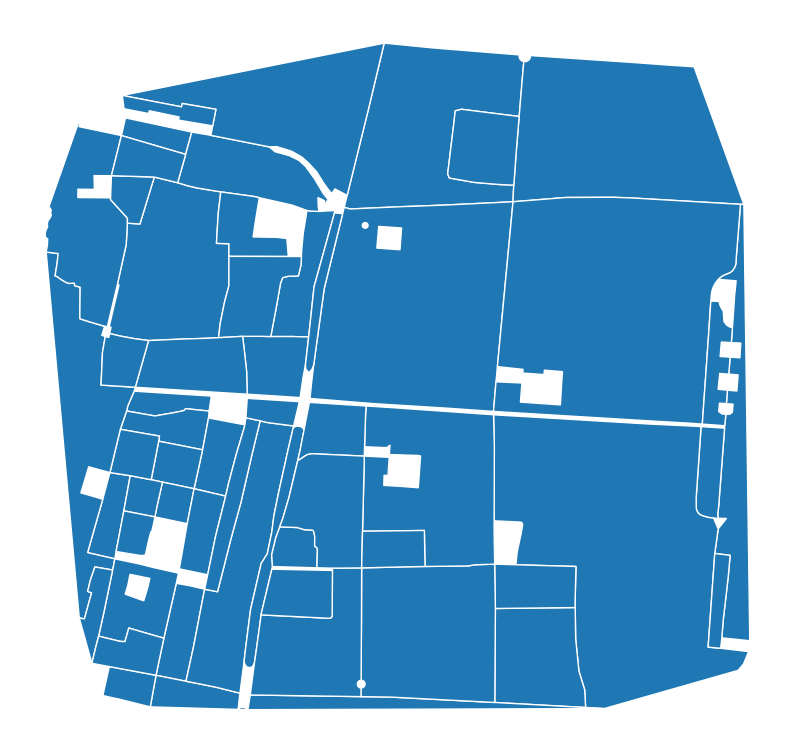

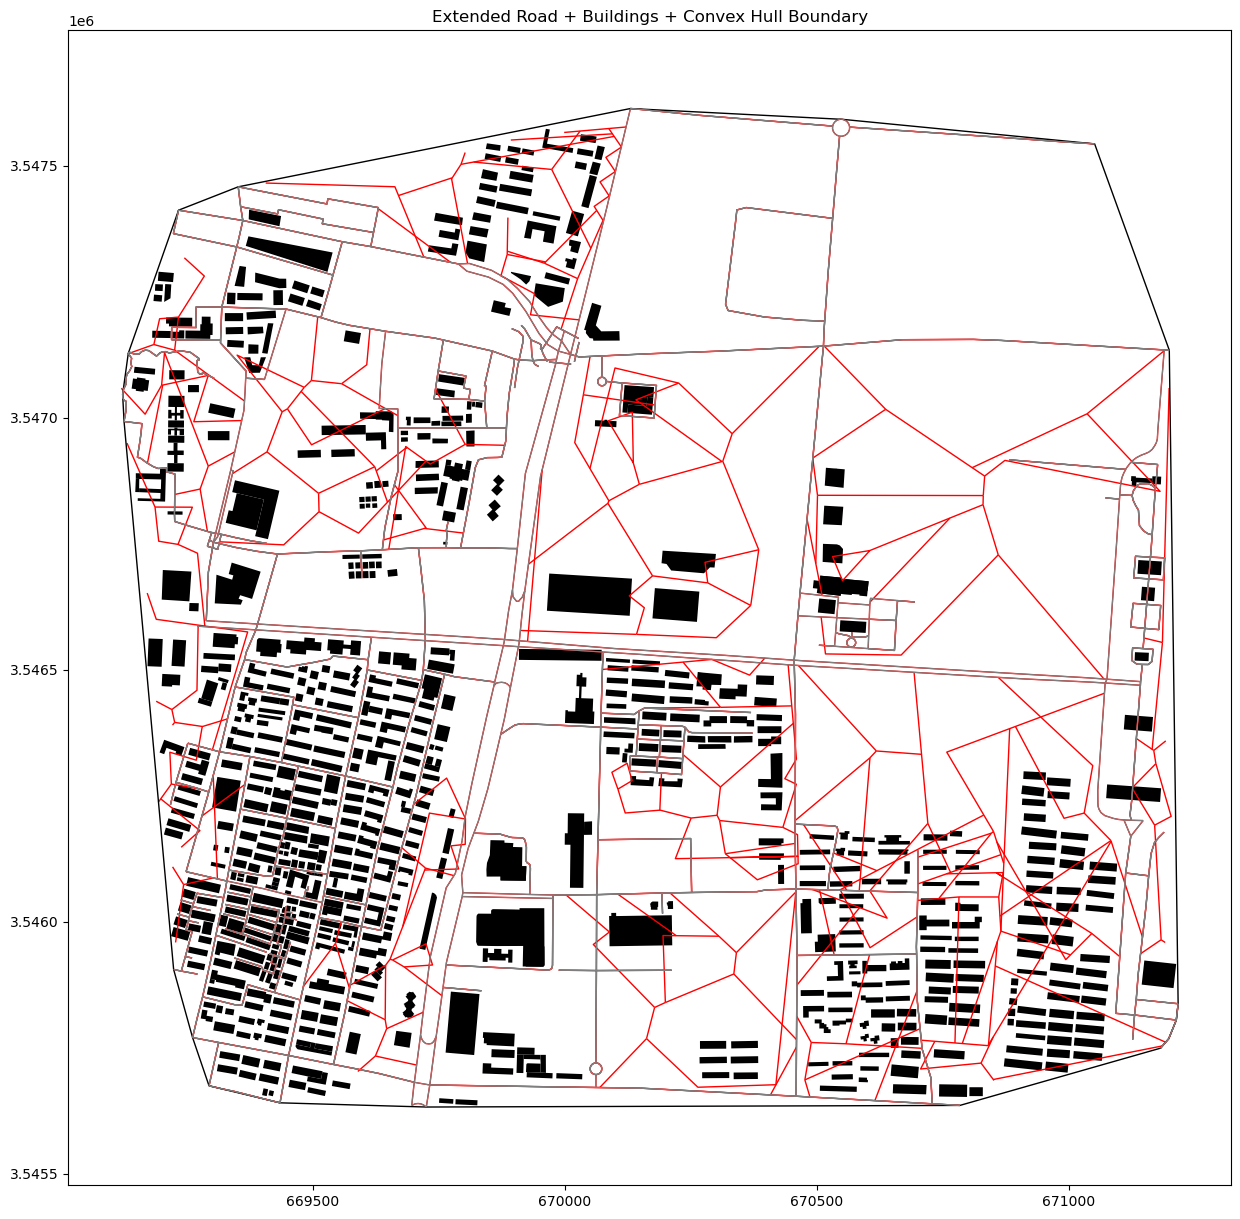

D:\Architecture\AAA-Master\25Spring\DIGITALFUTURE\Workshop\RoadGNN\segment_utils.py:167: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edges_gdf.to_file(os.path.join(output_dir, f"{area_name}_edges.shp"))
D:\STUDY\anaconda3\envs\urban_morphology\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(


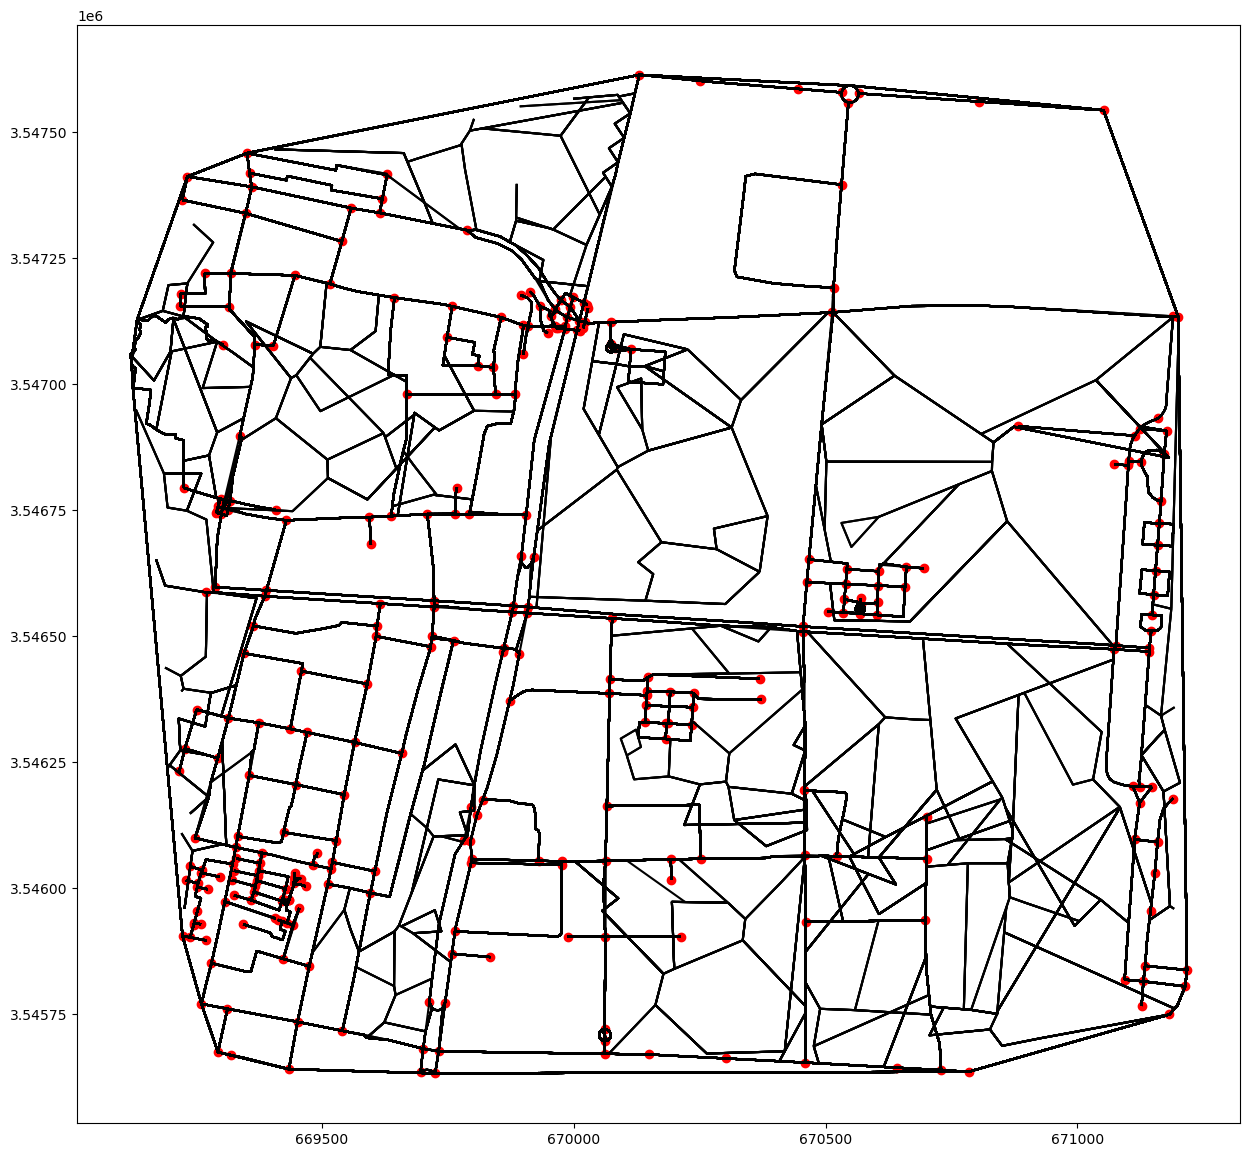

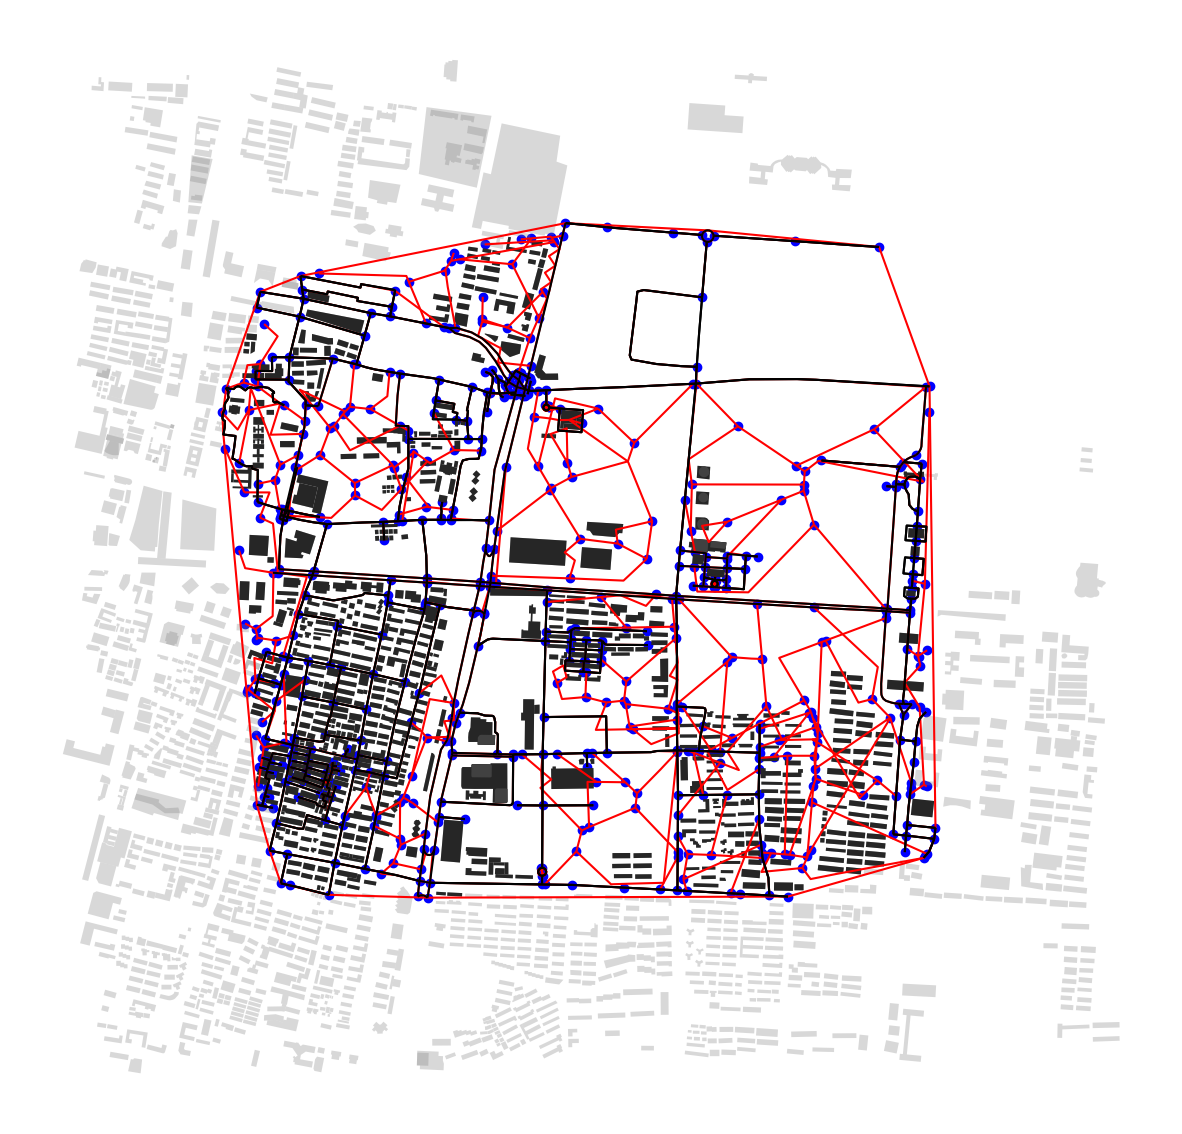

In [9]:
import os
from tqdm import tqdm
from utils import segment_utils

segment_utils.process_area("Nanjing_Meiyuan",spacing=50,min_length=5,epsilon=20)